DEA-AHP/GS - DEA GAUSSIAN AHP WITH PEARSON CORRECTION HYBRID METHOD

Levy Galas Jacob
Linkedin: https://www.linkedin.com/in/levygjacob/

Github: github.com/levygjacob

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [5]:
file_path = r"C:\Users\levyg\OneDrive\Desktop\Engenharia\Mestrado\Mestrado\Tópicos especiais em sistemas de apoio à decisão\DEA\Desenvolvimento DEA AHP\ARTIGO DEA GAUSSIANO CORREÇÃO PEARSON\DEA-AHPGS\Restaurant dataset.csv"
df = pd.read_csv(file_path, sep=';')

df

,Estabelecimento,Cod,Produto,Und,Qtd,Faturamento,Custo total,Lucro Bruto,Preço unit,Custo unit,Lucro unit
0,RESTAURANT D,2171,CAJA JARRA 500ML,UN,3,48.01,6.00,42.01,16.00,2.00,14.00
1,RESTAURANT A,2171,CAJA JARRA 500ML,UN,1,12.12,2.00,10.12,12.12,2.00,10.12
2,RESTAURANT D,2171,CAJA JARRA 500ML,UN,2,24.83,4.00,20.83,12.42,2.00,10.42
3,RESTAURANT A,2171,CAJA JARRA 500ML,UN,1,12.46,2.00,10.46,12.46,2.00,10.46
4,RESTAURANT C,2171,CAJA JARRA 500ML,UN,1,12.53,2.00,10.53,12.53,2.00,10.53
...,...,...,...,...,...,...,...,...,...,...,...
115293,RESTAURANT A,514,ESPUMANTE CHANDON PASSION 750ML,UND,1,162.99,97.71,65.28,162.99,97.71,65.28
115294,RESTAURANT A,514,ESPUMANTE CHANDON PASSION 750ML,UND,1,162.99,97.71,65.28,162.99,97.71,65.28
115295,RESTAURANT A,514,ESPUMANTE CHANDON PASSION 750ML,UND,1,162.99,97.71,65.28,162.99,97.71,65.28
115296,RESTAURANT A,514,ESPUMANTE CHANDON PASSION 750ML,UND,1,162.99,97.71,65.28,162.99,97.71,65.28


EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115298 entries, 0 to 115297
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Estabelecimento  115298 non-null  object 
 1   Cod              115298 non-null  object 
 2   Produto          115298 non-null  object 
 3   Und              115298 non-null  object 
 4   Qtd              115298 non-null  int64  
 5   Faturamento      115298 non-null  float64
 6   Custo total      115298 non-null  float64
 7   Lucro Bruto      115298 non-null  float64
 8   Preço unit       115298 non-null  float64
 9   Custo unit       115298 non-null  float64
 10  Lucro unit       115298 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 9.7+ MB


In [7]:
df.describe()

,Qtd,Faturamento,Custo total,Lucro Bruto,Preço unit,Custo unit,Lucro unit
count,115298.000000,115298.000000,115298.000000,115298.000000,115298.000000,115298.000000,115298.000000
mean,5.615874,106.168793,40.392367,65.776690,33.607119,11.035342,22.571895
std,23.340137,176.857593,124.622175,161.417864,37.587033,19.269292,34.753231
min,1.000000,0.000000,0.320000,-5221.970000,0.000000,0.320000,-188.180000
25%,1.000000,26.990000,6.630000,17.500000,12.700000,3.260000,7.610000
50%,2.000000,53.970000,15.410000,36.090000,21.990000,5.730000,15.990000
75%,4.000000,115.990000,36.830000,80.280000,35.180000,12.110000,26.110000
max,1730.000000,5652.890000,5303.480000,3799.910000,1549.990000,1135.960000,414.030000


In [8]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr() # Selecionar somente colunas com dados numéricos
corr_matrix

,Qtd,Faturamento,Custo total,Lucro Bruto,Preço unit,Custo unit,Lucro unit
Qtd,1.000000,0.582600,0.472904,0.273222,-0.094114,-0.047983,-0.075183
Faturamento,0.582600,1.000000,0.470808,0.732165,0.332188,0.104781,0.301175
Custo total,0.472904,0.470808,1.000000,-0.256207,0.036553,0.579716,-0.281898
Lucro Bruto,0.273222,0.732165,-0.256207,1.000000,0.335740,-0.332766,0.547621
Preço unit,-0.094114,0.332188,0.036553,0.335740,1.000000,0.397848,0.860947
Custo unit,-0.047983,0.104781,0.579716,-0.332766,0.397848,1.000000,-0.124176
Lucro unit,-0.075183,0.301175,-0.281898,0.547621,0.860947,-0.124176,1.000000


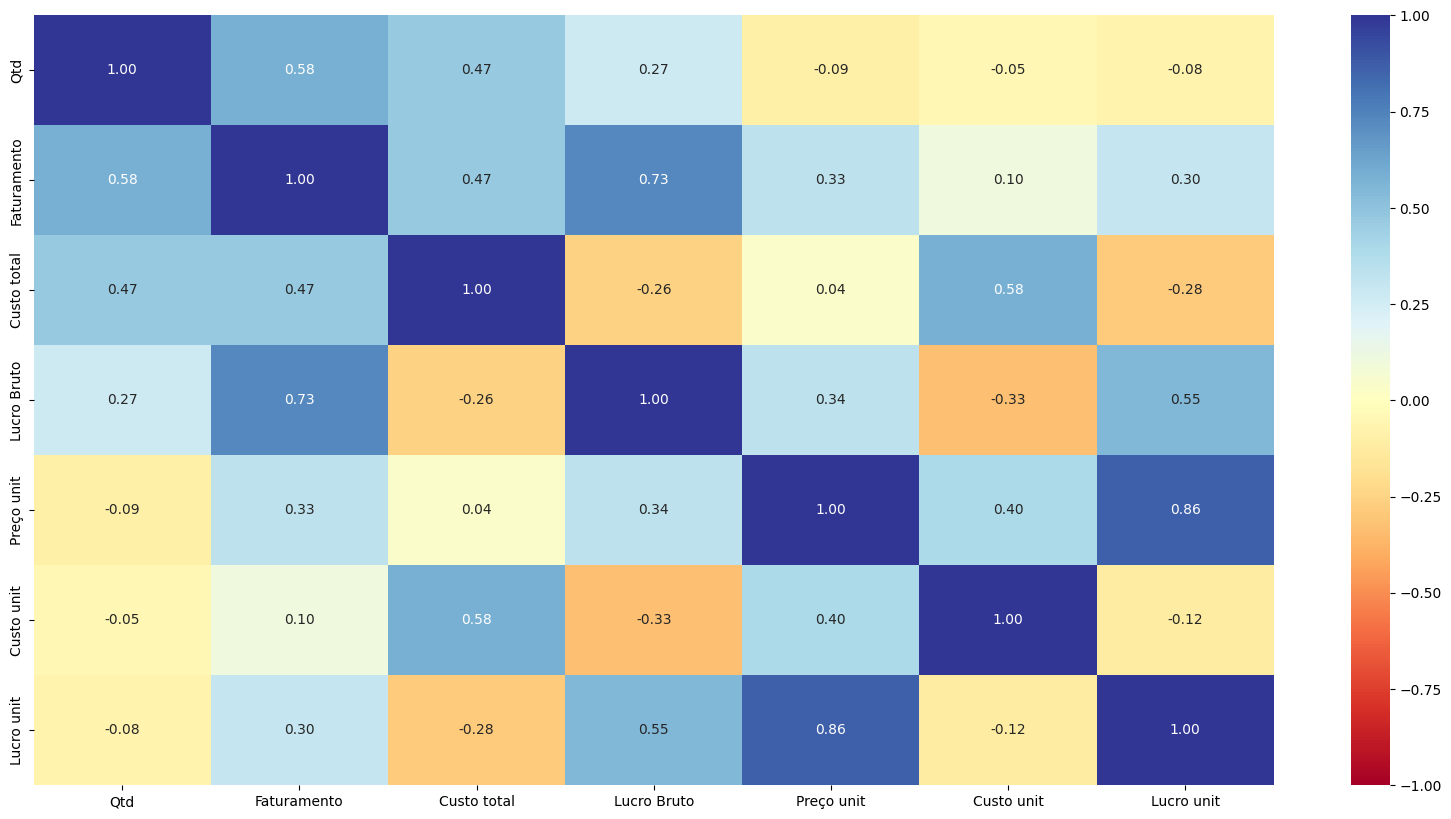

In [9]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="RdYlBu", cbar=True)
plt.show()

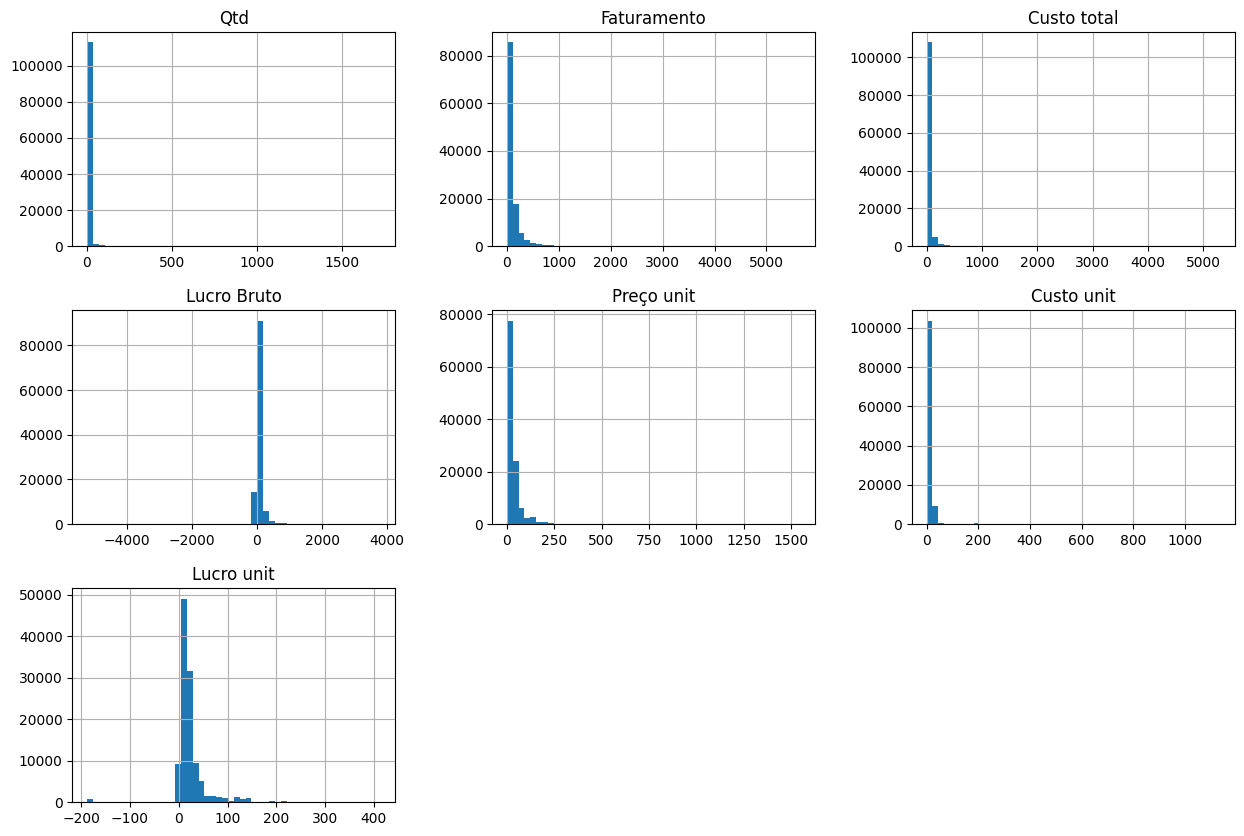

In [10]:
g = df.hist(bins = 50, figsize = (15, 10))

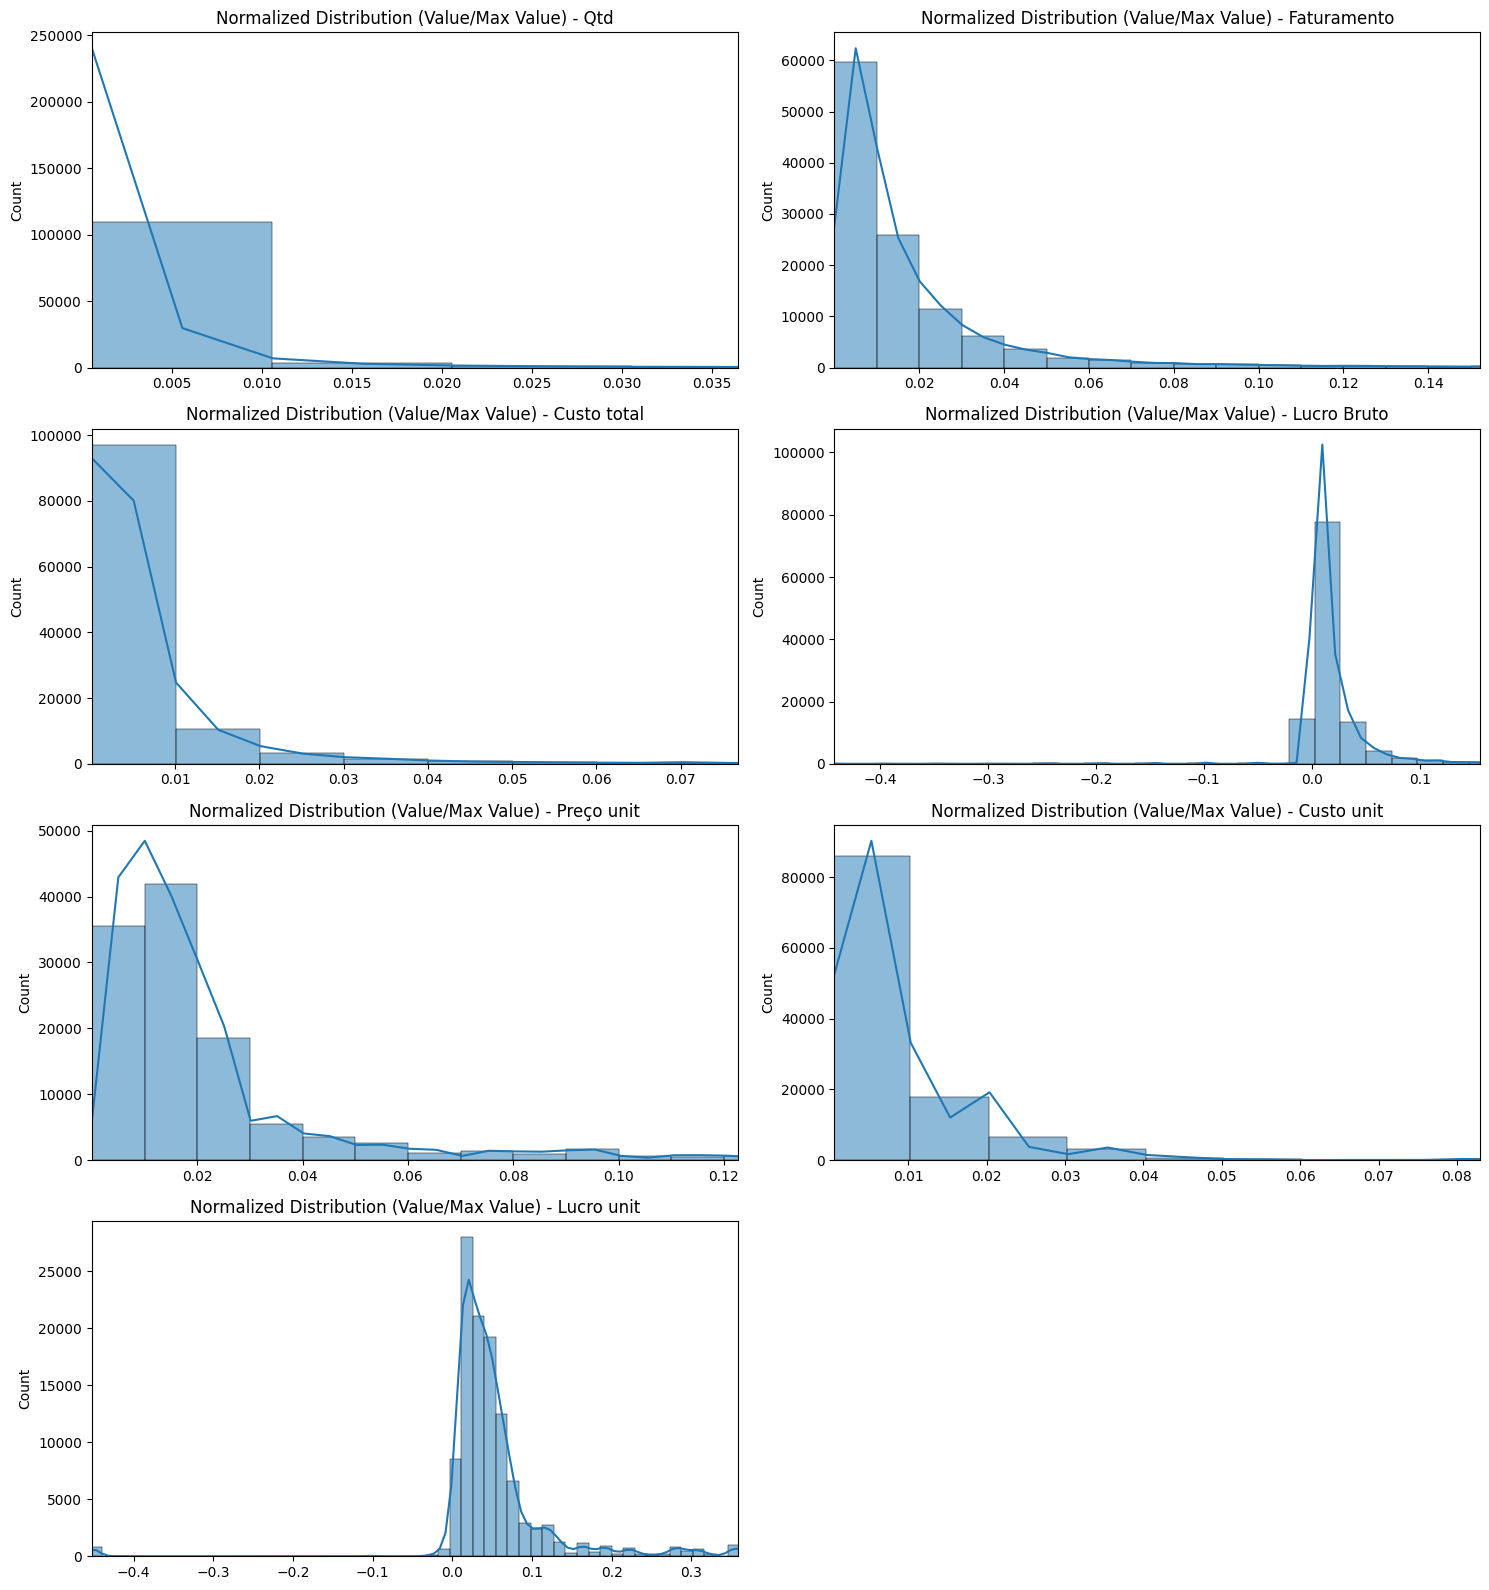

In [11]:
# Define the columns of interest
colunas = ['Qtd', 'Faturamento', 'Custo total', 'Lucro Bruto', 'Preço unit', 'Custo unit', 'Lucro unit']

# Ensure the columns exist in the DataFrame
colunas_existentes = [col for col in colunas if col in df.columns]
num_colunas = len(colunas_existentes)

# Calculate the number of rows needed for the subplots (only normalized plots)
num_linhas = (num_colunas + 1) // 2

# Dynamically create the subplots
fig, axs = plt.subplots(nrows=num_linhas, ncols=2, figsize=(15, num_linhas * 4))
axs = axs.flatten()  # Convert subplots into a flat list

# Percentiles to define plot limits
percentil_min = 0.1
percentil_max = 99

# Normalize and plot each column
for i, coluna in enumerate(colunas_existentes):
    # Get the original values (remove NaN before processing)
    valores_orig = df[coluna].dropna().values

    # Calculate normalization (value / max value)
    max_val = valores_orig.max()
    valores_norm = valores_orig / max_val if max_val != 0 else valores_orig

    # Get the percentiles for the normalized histogram
    min_val_norm = np.percentile(valores_norm, percentil_min)
    max_val_norm = np.percentile(valores_norm, percentil_max)

    # Plot the normalized histogram
    sns.histplot(valores_norm, bins=100, kde=True, ax=axs[i])
    axs[i].set_title(f'Normalized Distribution (Value/Max Value) - {coluna}')
    axs[i].set_xlim(left=min_val_norm, right=max_val_norm)  # Adjust X-axis limits

# Remove empty subplots, if any
for j in range(num_colunas, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


AHP/GS Stage

In [12]:
# Group the data by the 'Estabelecimento' column and sum the input and output values
df_grouped = df.groupby('Estabelecimento').sum().reset_index()

# Select all relevant columns
valores_norm = ['Qtd', 'Custo total', 'Lucro Bruto']

# Function to calculate normalized Gaussian factors
def calcular_fator_gaussiano_normalizado(df, columns):
    media = df[columns].mean()  # Calculate the mean of the selected columns
    desvio_padrao = df[columns].std()  # Calculate the standard deviation of the selected columns
    fator_gaussiano = desvio_padrao / media  # Compute the Gaussian factor (coefficient of variation)
    return fator_gaussiano / fator_gaussiano.max()  # Normalize the factors to a [0, 1] scale

# Calculate the normalized Gaussian factor for all selected columns
fator_gaussiano_normalizado = calcular_fator_gaussiano_normalizado(df_grouped, valores_norm)

# Display the normalized Gaussian factor for verification
print("Normalized Gaussian Factor (weights) for All Columns:")
print(fator_gaussiano_normalizado)

# Pearson Correction: Adjust weights based on correlation between variables
# Calculate the Pearson correlation between calculated weights and comparisons (if applicable)
# Use a correlation matrix to simulate relationships among selected columns
corr_matrix = df_grouped[valores_norm].corr()

# Use the Pearson correlation coefficient to adjust the weights
# The adjustment is done by multiplying weights by the average correlation between variables
coef_pearson = corr_matrix.mean().mean()  # Overall mean correlation among variables
pesos_ajustados = fator_gaussiano_normalizado * coef_pearson  # Adjust weights using the Pearson coefficient

# Display the Pearson correction factor
print("\nPearson Correction Factor:")
print(coef_pearson)

# Display the adjusted weights after applying the Pearson correction
print("\nAdjusted Weights after Pearson Correction:")
print(pesos_ajustados)


Normalized Gaussian Factor (weights) for All Columns:
Qtd            0.679789
Custo total    0.626508
Lucro Bruto    1.000000
dtype: float64

Pearson Correction Factor:
0.9795469274257652

Adjusted Weights after Pearson Correction:
Qtd            0.665885
Custo total    0.613694
Lucro Bruto    0.979547
dtype: float64


DEA Stage

Defining inputs and outputs

In [13]:
# Group the data by the 'Estabelecimento' column and sum the input and output values
df_grouped = df.groupby('Estabelecimento').sum().reset_index()

# Define inputs and outputs after normalization
inputs = df_grouped[['Qtd', 'Custo total']]  # Select input columns
outputs = df_grouped[['Lucro Bruto']]        # Select output column

# Normalize inputs and outputs by dividing by the maximum value of each column
inputs_normalized = inputs / inputs.max()    # Normalize inputs to a [0, 1] scale
outputs_normalized = outputs / outputs.max() # Normalize outputs to a [0, 1] scale

# Weights (normalized Gaussian factor) for inputs and outputs
input_weights = pesos_ajustados[['Qtd', 'Custo total']]    # Extract input weights
output_weights = pesos_ajustados[['Lucro Bruto']]          # Extract output weight

# Display results for verification
print("\nNormalized Inputs:")
print(inputs_normalized)
print("\nNormalized Outputs:")
print(outputs_normalized)
print("\nInput Weights:")
print(input_weights)
print("\nOutput Weights:")
print(output_weights)



Normalized Inputs:
        Qtd  Custo total
0  1.000000     1.000000
1  0.708224     0.664955
2  0.587092     0.569877
3  0.475860     0.548694

Normalized Outputs:
   Lucro Bruto
0     1.000000
1     0.474786
2     0.482592
3     0.382588

Input Weights:
Qtd            0.665885
Custo total    0.613694
dtype: float64

Output Weights:
Lucro Bruto    0.979547
dtype: float64


Weighting inputs and outputs

In [14]:
# Aplicar os pesos nos inputs e outputs normalizados
inputs_weighted = inputs_normalized * input_weights
outputs_weighted = outputs_normalized * output_weights

print("\nInputs weighted:")
print(inputs_weighted)
print("\nOutputs weighted:")
print(outputs_weighted)


Inputs weighted:
        Qtd  Custo total
0  0.665885     0.613694
1  0.471596     0.408079
2  0.390936     0.349730
3  0.316868     0.336730

Outputs weighted:
   Lucro Bruto
0     0.979547
1     0.465075
2     0.472721
3     0.374763


In [15]:
# List to store DMUs, efficiencies, weighted inputs, and weighted outputs
n_dmus = df_grouped.shape[0]  # Number of DMUs
efficiency_scores = []       # List to store efficiency scores
weighted_inputs_list = []    # List to store weighted inputs
weighted_outputs_list = []   # List to store weighted outputs

# Calculate efficiency for each DMU
for i in range(n_dmus):
    # Sum weighted inputs and outputs for DMU i
    weighted_sum_inputs = np.sum(inputs_weighted.iloc[i, :])   # Weighted sum of inputs
    weighted_sum_outputs = np.sum(outputs_weighted.iloc[i, :]) # Weighted sum of outputs

    # Calculate efficiency as the ratio between weighted outputs and weighted inputs
    efficiency = weighted_sum_outputs / weighted_sum_inputs

    # Store results in the respective lists
    efficiency_scores.append(efficiency)
    weighted_inputs_list.append(weighted_sum_inputs)
    weighted_outputs_list.append(weighted_sum_outputs)

# Convert lists to arrays for easier handling
efficiency_scores = np.array(efficiency_scores)
weighted_inputs_list = np.array(weighted_inputs_list)
weighted_outputs_list = np.array(weighted_outputs_list)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'Criteria': df_grouped['Estabelecimento'],   # DMU names
    'Weighted Inputs': weighted_inputs_list,     # Weighted inputs
    'Weighted Outputs': weighted_outputs_list,   # Weighted outputs
    'Efficiency': efficiency_scores              # Efficiency scores
})

# Normalize efficiencies to obtain "Relative Efficiency"
max_efficiency = np.max(efficiency_scores)  # Best efficiency score
df_results['Relative Efficiency'] = df_results['Efficiency'] / max_efficiency  # Relative efficiency scaling

# Sort DMUs by efficiency ranking
df_results = df_results.sort_values(by='Efficiency', ascending=False)  # Sort by efficiency (descending)
df_results['Ranking'] = df_results['Efficiency'].rank(ascending=False, method='min').astype(int)  # Assign rankings
df_results = df_results[['Criteria', 'Weighted Inputs', 'Weighted Outputs', 'Efficiency', 'Relative Efficiency', 'Ranking']]  # Reorder columns

# Display the results table with ranking
df_results = df_results.reset_index(drop=True)
df_results


,Criteria,Weighted Inputs,Weighted Outputs,Efficiency,Relative Efficiency,Ranking
0,RESTAURANT A,1.279579,0.979547,0.765523,1.000000,1
1,RESTAURANT C,0.740666,0.472721,0.638238,0.833729,2
2,RESTAURANT D,0.653598,0.374763,0.573384,0.749010,3
3,RESTAURANT B,0.879675,0.465075,0.528690,0.690626,4


Plotagem do gráfico (a refinar)

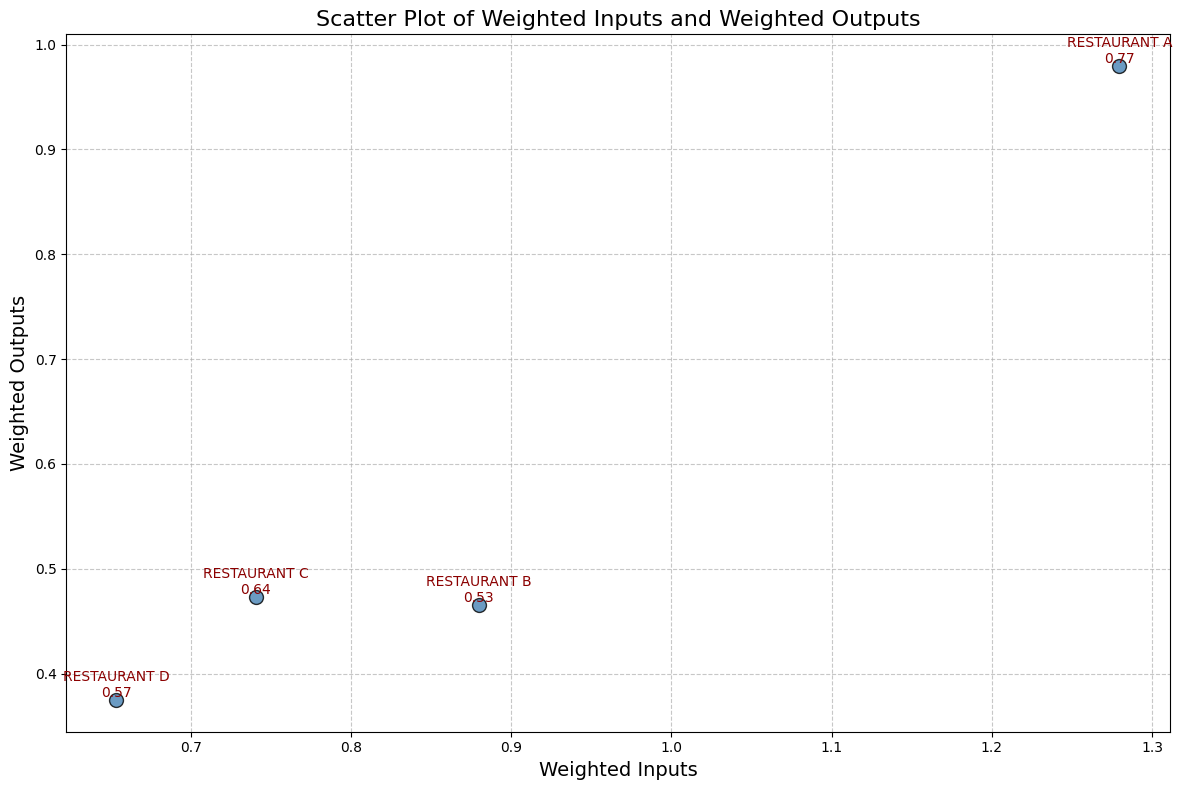

In [16]:
# Scatter plot
plt.figure(figsize=(12, 8))  # Set figure size

# Create the scatter plot
plt.scatter(
    df_results['Weighted Inputs'],   # Weighted Inputs on the X-axis
    df_results['Weighted Outputs'],  # Weighted Outputs on the Y-axis
    s=100,                           # Point size
    alpha=0.8,                       # Point transparency
    color='steelblue',               # Point color
    edgecolors='k'                   # Point border color
)

# Add data labels (DMU and Efficiency)
for i in range(len(df_results)):
    dmu = df_results['Criteria'].iloc[i]      # DMU name
    efficiency = df_results['Efficiency'].iloc[i]  # Efficiency score
    x = df_results['Weighted Inputs'].iloc[i]      # X coordinate
    y = df_results['Weighted Outputs'].iloc[i]     # Y coordinate
    plt.text(
        x, y,
        f'{dmu}\n{efficiency:.2f}',   # DMU name and efficiency (2 decimal places)
        fontsize=10, ha='center', va='bottom', color='darkred'  # Text styling
    )

# Add labels and title
plt.title('Scatter Plot of Weighted Inputs and Weighted Outputs', fontsize=16)  # Title
plt.xlabel('Weighted Inputs', fontsize=14)  # X-axis label
plt.ylabel('Weighted Outputs', fontsize=14)  # Y-axis label

# Adjust grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines

# Display the plot with proper layout
plt.tight_layout()
plt.show()
